In [3]:
# Notice: For visualization of map, we need basemap package.
# if we dont have basemap install on your machine, we can use the following line to install it
!conda install -c conda-forge  basemap matplotlib==3.1 -y
# Notice: we maight have to refresh our page and re-run the notebook after installation

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.


Examining matplotlib==3.1: 100%|##########| 5/5 [00:04<00:00,  1.80it/s]
                                                                        

Determining conflicts:   0%|          | 0/5 [00:00<?, ?it/s]
Examining conflict for matplotlib python basemap:   0%|          | 0/5 [00:00<?, ?it/s]
Examining conflict for matplotlib basemap:  60%|######    | 3/5 [00:01<00:00,  2.22it/s]
                                                                                        

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed




  - matplotlib==3.1 -> python[version='>=3.6,<3.7.0a0|>=3.7,<3.8.0a0']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.

The following specifications were found to be incompatible with each other:

Output in format: Requested package -> Available versions

Package ca-certificates conflicts for:
basemap -> python[version='>=2.7,<2.8.0a0'] -> ca-certificates
python=3.8 -> openssl[version='>=1.1.1j,<1.1.2a'] -> ca-certificates



In [4]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
'''Data generation
The function below will generate the data points and requires these inputs:

centroidLocation: Coordinates of the centroids that will generate the random data.
Example: input: [[4,3], [2,-1], [-1,4]]
numSamples: The number of data points we want generated, split over the number of 
centroids (# of centroids defined in centroidLocation)
Example: 1500
clusterDeviation: The standard deviation between the clusters. The larger the number, the further the spacing.
Example: 0.5'''
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

In [6]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

In [7]:
'''Modeling
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common 
clustering algorithms which works based on density of object. The whole idea is that if a particular point belongs to a cluster,
it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points
Epsilon determine a specified radius that if includes enough number of points within, we call it dense area
minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.'''

'Modeling\nDBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common \nclustering algorithms which works based on density of object. The whole idea is that if a particular point belongs to a cluster,\nit should be near to lots of other points in that cluster.\n\nIt works based on two parameters: Epsilon and Minimum Points\nEpsilon determine a specified radius that if includes enough number of points within, we call it dense area\nminimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.'

In [8]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
'''Distinguish outliers
Lets Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.'''
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [10]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [11]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{0, 1, 2}

In [12]:
'''Data visualization'''
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


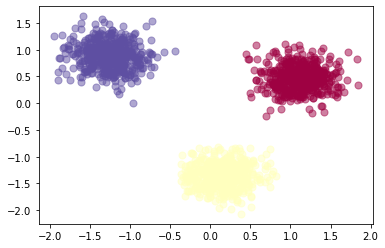

In [13]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


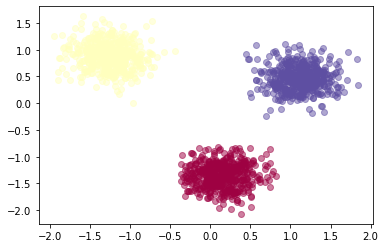

In [14]:
'''To better underestand differences between partitional and density-based clusteitng, try to cluster the above dataset into 
3 clusters using k-Means. Notice: do not generate data again, use the same dataset as above.'''
# write your code here
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()